In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
uni = pd.read_csv("Universities.csv")
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
uni.describe() # data should be normalized

In [ ]:
# Considering only numerical data
uni = uni.iloc[:,1:] # exclude 0th column i.e. univ. name
uni.head()

In [ ]:
# Normalizing the numerical data
std = StandardScaler()
uni_normal=std.fit_transform(uni)
uni_normal

In [7]:
pca=PCA()
pca_components=pca.fit_transform(uni_normal)

In [8]:
# The amount of variance that each PCA explains is
pca.explained_variance_ # 1st column contains 4.80425527 variance .. upto 6th col contains 0.02755274 variance

array([4.80425527, 0.81960016, 0.29850193, 0.17060428, 0.12948562,
       0.02755274])

In [9]:
# in percentage - The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [10]:
# Cumulative variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1 # 76   76+13=89   89+4=93 and so on i.e. if you stop upto 3rd column still you will get 95 %

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [11]:
pca.components_ # 6 dimensional components

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [ ]:
 # linear combination equation, constant values are taken from above array o/p
 # PCA1 = -0.45*SAT - 0.427*Top10 + 0.42*Accept + 0.39*SFRatio - 0.36*Expenses - 0.37*GradRate

 # Thus all 6 principal components can be calculated using above 6 values

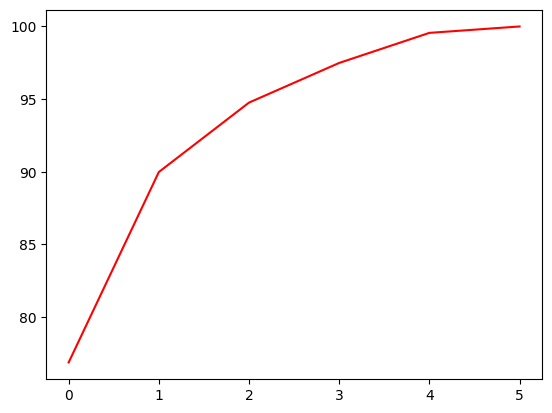

In [12]:
# Variance plot for PCA components obtained
plt.plot(var1, color="red") # var1 is cumulative percentage on y axis and index on x axis
# looking at graph you can decide how much percentage you want and accordingly go for that much column numbers


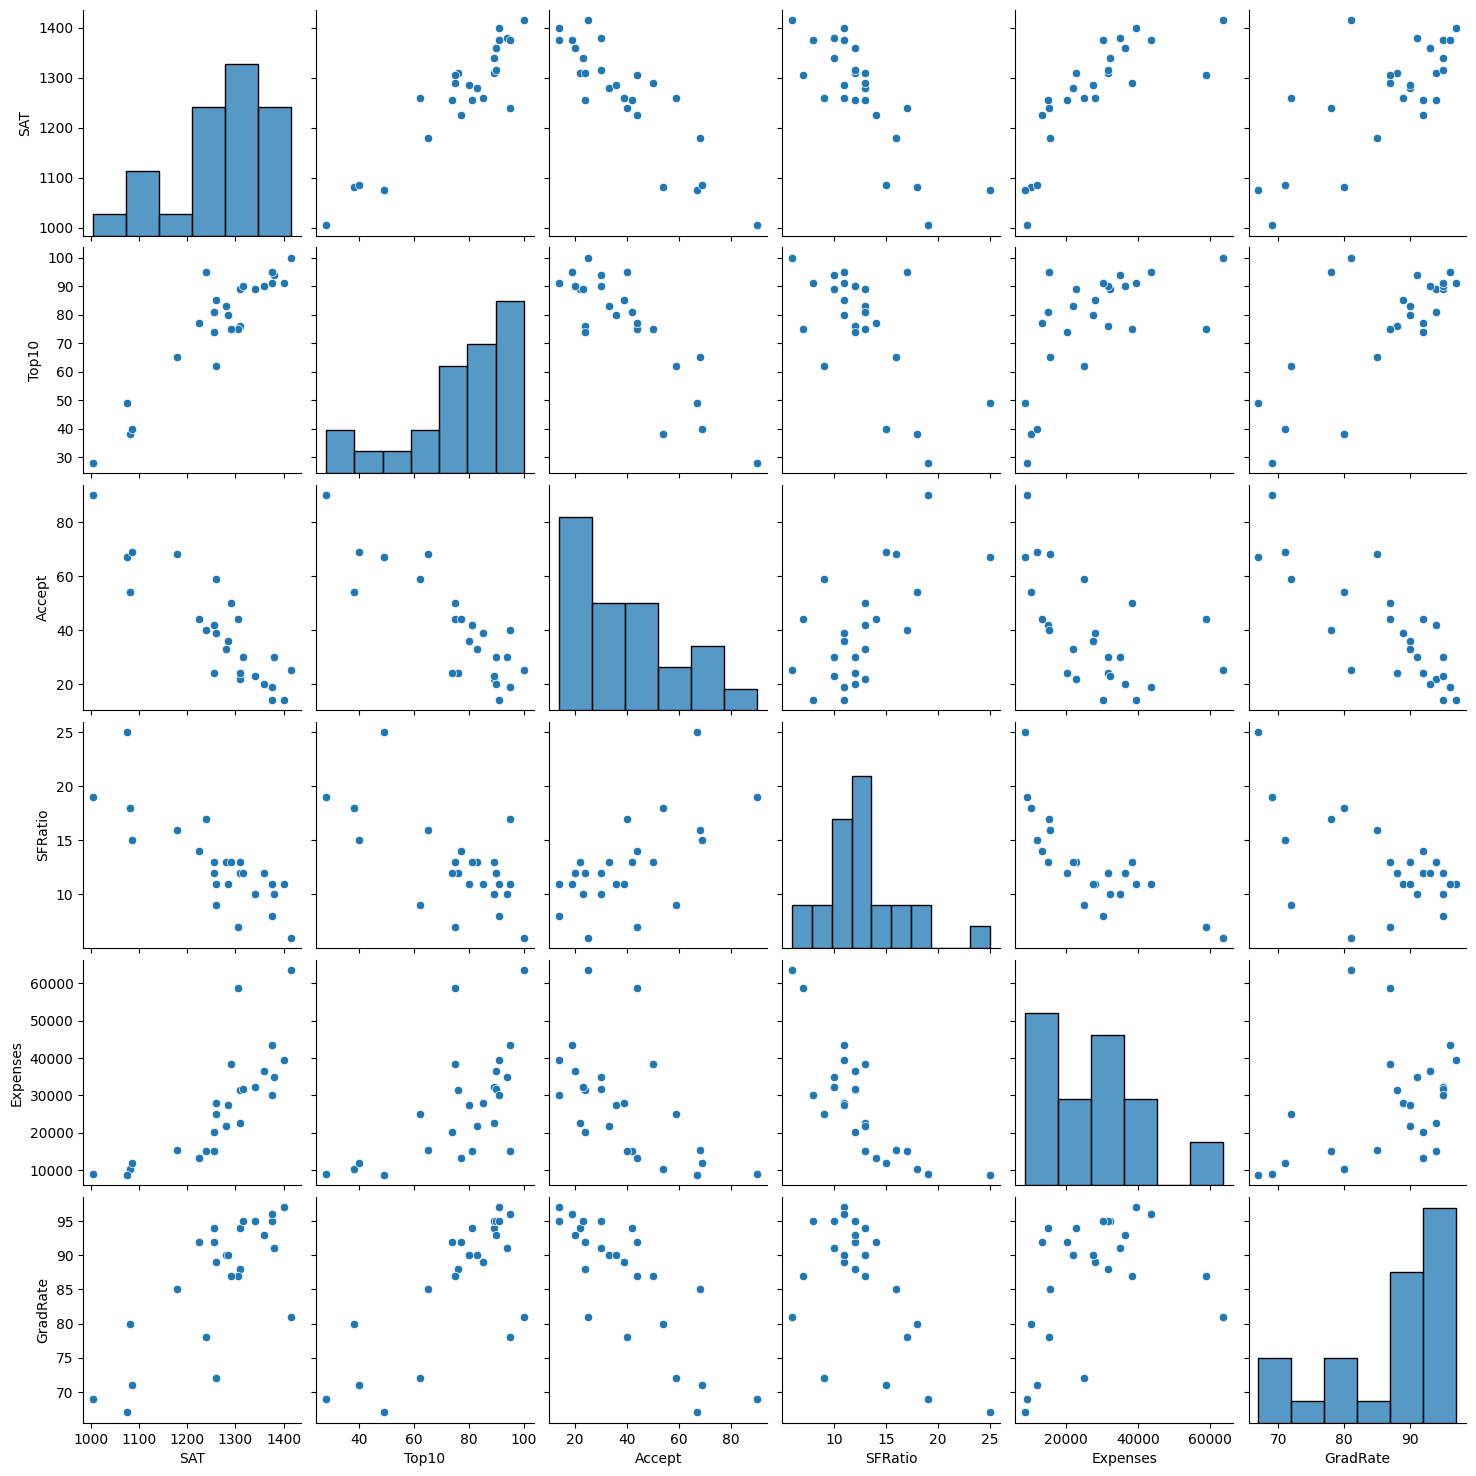

In [15]:
import seaborn as sns
sns.pairplot(uni) # can check scatterplot with original dataset and see the difference

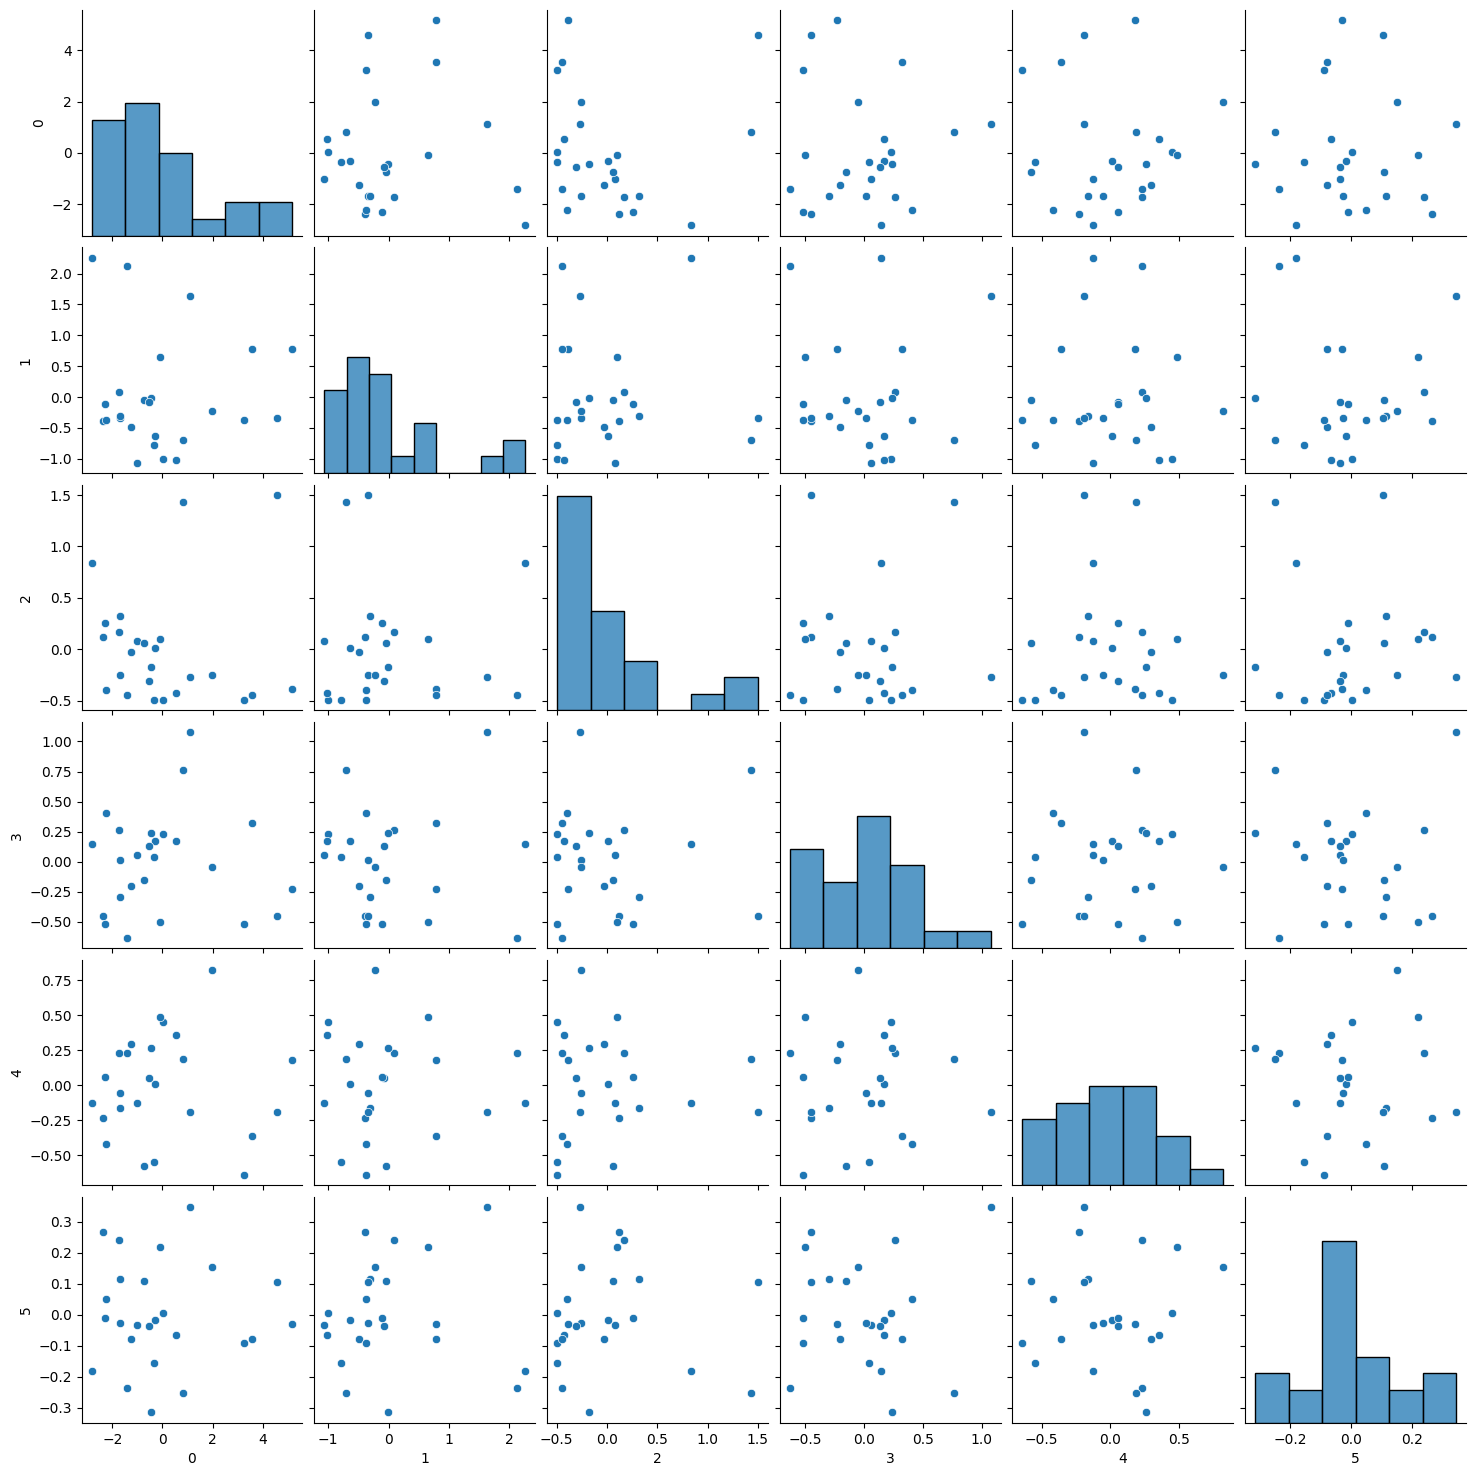

In [14]:
# Why scatterplot? - After applying PCA there should not be any correlation. Thus multicollinearity is removed or not that you can cross check.
sns.pairplot(pd.DataFrame(pca_components))